In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras import Model,Sequential
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 直接读取之前存储的二进制文件
train_x = np.load("train_x.npy")
train_y = np.load("train_y.npy")

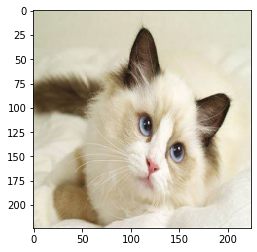

(20, 224, 224, 3)
(20,)


In [3]:
plt.imshow(train_x[0])
plt.show()
print(train_x.shape)
print(train_y.shape)

In [4]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(2,activation='softmax'))

# 模型编译
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history=model.fit(train_x, train_y, epochs=50)

Train on 20 samples
Epoch 1/50
20/20 [==============================] - 2s 90ms/sample - loss: 0.6945 - accuracy: 0.4500
Epoch 2/50
20/20 [==============================] - 1s 56ms/sample - loss: 0.6804 - accuracy: 0.7500
Epoch 3/50
20/20 [==============================] - 1s 68ms/sample - loss: 0.7441 - accuracy: 0.5000
Epoch 4/50
20/20 [==============================] - 1s 55ms/sample - loss: 1.3091 - accuracy: 0.5000
Epoch 5/50
20/20 [==============================] - 1s 65ms/sample - loss: 0.7271 - accuracy: 0.5000
Epoch 6/50
20/20 [==============================] - 1s 63ms/sample - loss: 0.6758 - accuracy: 0.6000
Epoch 7/50
20/20 [==============================] - 1s 56ms/sample - loss: 0.6826 - accuracy: 0.5000
Epoch 8/50
20/20 [==============================] - 1s 63ms/sample - loss: 0.6832 - accuracy: 0.5000
Epoch 9/50
20/20 [==============================] - 1s 54ms/sample - loss: 0.6778 - accuracy: 0.5000
Epoch 10/50
20/20 [==============================] - 1s 56ms/sample - l

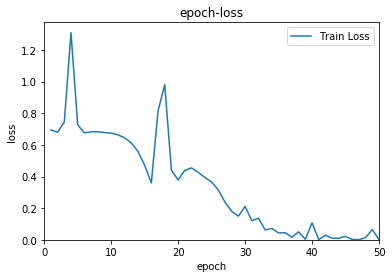

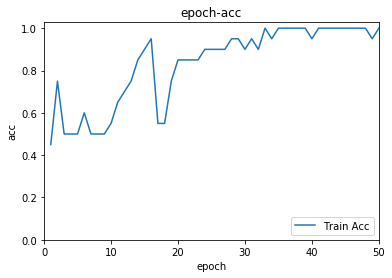

In [7]:
l = np.array(history.history['loss'])
a = np.array(history.history['accuracy'])
step = np.linspace(1,50,50)
plt.plot(step,l,label="Train Loss")
plt.legend(loc='upper right')
plt.title('epoch-loss')
plt.xlim((0, 50))
plt.gca().set_ylim(bottom=0)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(step,a,label="Train Acc")
plt.legend(loc='lower right')
plt.title('epoch-acc')
plt.xlim((0, 50))
plt.gca().set_ylim(bottom=0)
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [8]:
model.save('./model/j.h5')